In [8]:
import os
import loompy as lp
import numpy as np
import pandas as pd
import scanpy as sc

In [15]:
def create_loom(adata, path):
    row = {"Gene": np.array(adata.var_names)}
    col = {"CellID": np.array(adata.obs_names),"nGene": np.array(np.sum(adata.X.transpose()>0 , axis=0)).flatten() ,"nUMI": np.array(np.sum(adata.X.transpose() , axis=0)).flatten()}
    matrix = adata.X.transpose()
    lp.create(path, matrix, row, col)

adata = sc.read_h5ad('../../output/annotated_subset_with_latent.h5ad')
adata.X = adata.layers['counts']
adata

AnnData object with n_obs × n_vars = 51879 × 36579
    obs: 'sample_id', 'tissue', 'patient_id', 'author', 'barcode', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'scDblFinder_score', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'leiden', 'developing_human_brain_anno', 'developing_human_brain_conf_score', 'human_adultaged_hippocampus_anno', 'human_adultaged_hippocampus_conf_score', 'human_longitudinal_hippocampus_anno', 'human_longitudinal_hippocampus_conf_score', 'gbmap_ref_model_anno', 'gbmap_ref_model_conf_score', 'gbmap_ref_hvg_anno', 'gbmap_ref_hvg_conf_score', 'cell_type', 'cas_cell_type_score_1', 'cas_cell_type_name_1', 'cas_cell_type_label_1', 'cas_cell_type_score_2', 'cas_cell_type_name_2', 'cas_cell_type_label_2', 'cas_cell_type_score_3', 'cas_cell_type_name_3', 'cas_cell_type_label_3', 'cnv_leiden', 'cnv_score', 'each_cell_type'

- look at batch effects -> there are batch effects, but not that strong

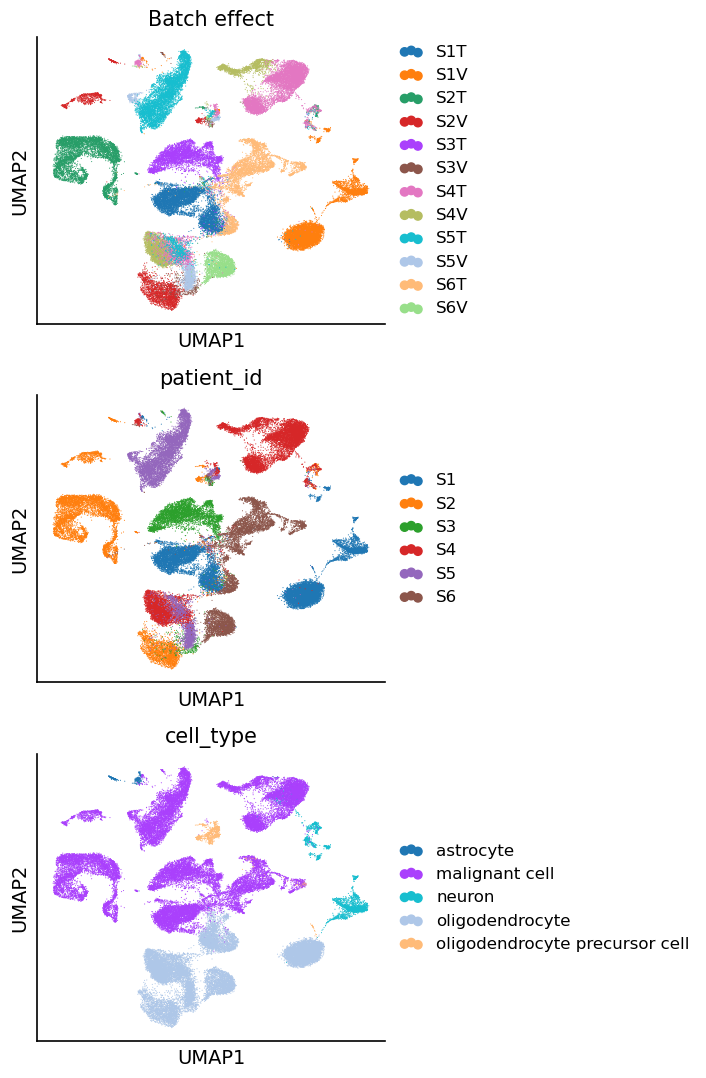

In [5]:
# check for batch effect 
import mplscience
import matplotlib.pyplot as plt
bdata = adata.copy()
sc.pp.normalize_total(bdata)
sc.pp.log1p(bdata)
sc.pp.highly_variable_genes(bdata)
sc.tl.pca(bdata)
sc.pp.neighbors(bdata)
sc.tl.umap(bdata)
with mplscience.style_context():
    sc.pl.umap(bdata, color=['sample_id', 'patient_id', 'cell_type'], title = "Batch effect", ncols = 1) 
    plt.show()
del bdata

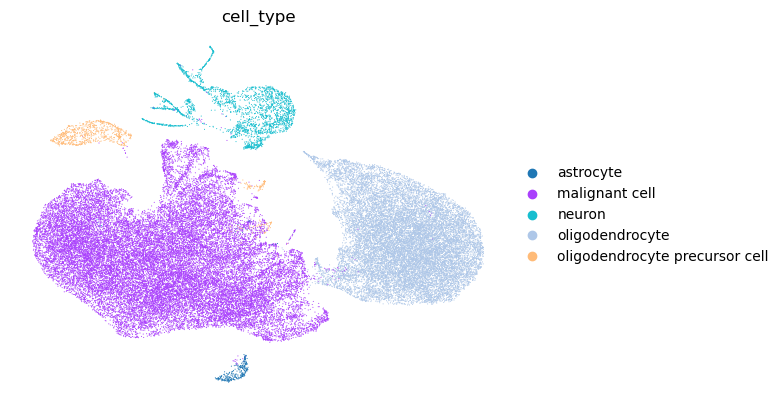

In [16]:
sc.pl.umap(adata, color = 'cell_type', frameon = False)

In [17]:
create_loom(adata, '../../intermediate_output/annotated_subset.loom')

- then run, scenic iterations for 100x : [iter_scenic.sh](../../scripts/iter_scenic.sh)